In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# open csv file and load the data into pandas dataframe
appl_df = pd.read_csv('../data/raw/loan.csv', low_memory=False)
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [4]:
appl_df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [5]:
appl_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [7]:
appl_df.count(axis=0, numeric_only=False)

id                                                  0
member_id                                           0
loan_amnt                                     2260668
funded_amnt                                   2260668
funded_amnt_inv                               2260668
term                                          2260668
int_rate                                      2260668
installment                                   2260668
grade                                         2260668
sub_grade                                     2260668
emp_title                                     2093699
emp_length                                    2113761
home_ownership                                2260668
annual_inc                                    2260664
verification_status                           2260668
issue_d                                       2260668
loan_status                                   2260668
pymnt_plan                                    2260668
url                         

In [8]:
#member id and ids are all uniques, we will drop these fields
appl_df.drop('member_id', axis=1, inplace=True)
appl_df.drop('id', axis=1, inplace=True)

In [9]:
appl_df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [10]:
appl_df.shape

(2260668, 143)

In [11]:
df_cleanAppl = appl_df[(appl_df.loan_status == 'Fully Paid') | (appl_df.loan_status == 'Charged Off')]

In [12]:
df_cleanAppl.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [13]:
df_cleanAppl.shape

(1303607, 143)

In [14]:
df_cleanAppl.loan_status.value_counts(normalize=True) #About 80% are ‘Fully Paid’ and 20% are ‘Charged Off’So our sample is biased in this case

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [15]:
df_cleanAppl.isnull().any().value_counts() #103 COLUMNS HAVE MISSING VALUES

True     103
False     40
dtype: int64

In [16]:
print(df_cleanAppl.isnull().count())

loan_amnt                                     1303607
funded_amnt                                   1303607
funded_amnt_inv                               1303607
term                                          1303607
int_rate                                      1303607
installment                                   1303607
grade                                         1303607
sub_grade                                     1303607
emp_title                                     1303607
emp_length                                    1303607
home_ownership                                1303607
annual_inc                                    1303607
verification_status                           1303607
issue_d                                       1303607
loan_status                                   1303607
pymnt_plan                                    1303607
url                                           1303607
desc                                          1303607
purpose                     

In [17]:
print(df_cleanAppl.count())

loan_amnt                                     1303607
funded_amnt                                   1303607
funded_amnt_inv                               1303607
term                                          1303607
int_rate                                      1303607
installment                                   1303607
grade                                         1303607
sub_grade                                     1303607
emp_title                                     1221028
emp_length                                    1228153
home_ownership                                1303607
annual_inc                                    1303607
verification_status                           1303607
issue_d                                       1303607
loan_status                                   1303607
pymnt_plan                                    1303607
url                                                 0
desc                                           123327
purpose                     

In [18]:
print(len(df_cleanAppl))

1303607


In [19]:
# we will calculate the percentage of missing values by features
total_num = df_cleanAppl.isnull().sum().sort_values(ascending=False)

perc = df_cleanAppl.isnull().sum()/len(df_cleanAppl) *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame of missing percentages
df_miss = pd.concat([total_num, perc1], axis=1, keys =["Total Missing Values", "Percentage %"], sort=True).sort_values(by =["Percentage %"], ascending = False)
df_miss.reset_index(inplace=True)

In [20]:
df_miss

,index,Total Missing Values,Percentage %
0,url,1303607,100.00
1,next_pymnt_d,1303607,100.00
2,orig_projected_additional_accrued_interest,1300174,99.74
3,deferral_term,1298272,99.59
4,hardship_last_payment_amount,1298272,99.59
5,hardship_payoff_balance_amount,1298272,99.59
6,hardship_end_date,1298272,99.59
7,hardship_dpd,1298272,99.59
8,hardship_amount,1298272,99.59
9,hardship_reason,1298272,99.59


In [21]:
df_miss[df_miss['Percentage %']>50].count()

index                   56
Total Missing Values    56
Percentage %            56
dtype: int64

In [22]:
df_miss.count()

index                   143
Total Missing Values    143
Percentage %            143
dtype: int64

In [23]:
# drop all those features that has more than 50% missing values
df_NewAppl = df_cleanAppl.drop(df_miss[df_miss["Percentage %"]>50]["index"], axis = 1)

In [24]:
df_NewAppl.shape

(1303607, 87)

In [25]:
df_miss[df_miss["Percentage %"]>50]["index"] # features that were dropped

0                                            url
1                                   next_pymnt_d
2     orig_projected_additional_accrued_interest
3                                  deferral_term
4                   hardship_last_payment_amount
5                 hardship_payoff_balance_amount
6                              hardship_end_date
7                                   hardship_dpd
8                                hardship_amount
9                                hardship_reason
10                           hardship_start_date
11                               hardship_status
12                                 hardship_type
13                          hardship_loan_status
14                               hardship_length
15                       payment_plan_start_date
16           sec_app_mths_since_last_major_derog
17                            sec_app_revol_util
18                         sec_app_num_rev_accts
19              sec_app_chargeoff_within_12_mths
20                  

In [26]:
df_NewAppl = df_cleanAppl
df_NewAppl.shape

(1303607, 143)

In [27]:
df_NewAppl.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                                           float64
desc                                           object
purpose                     

In [28]:
keep_list = ['addr_state','annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'annual_inc_norm', 'target']
drop_list = [col for col in df_NewAppl.columns if col not in keep_list]
print(drop_list) 

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'pymnt_plan', 'url', 'desc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_r

In [29]:
df_NewAppl.drop(labels=drop_list, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
df_NewAppl.shape

(1303607, 27)

In [31]:
sorted(df_NewAppl.columns)

['addr_state',
 'annual_inc',
 'application_type',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code']

In [32]:
#Zip code is in the format-891xx    900xx    etc. We have clean that.
df_NewAppl.zip_code = df_NewAppl.zip_code.str.replace("xx","") 

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
#Next is formatting the dates- for e.g. Oct-2013 to 2015-10-01  format

df_NewAppl['earliest_cr_line'] = pd.to_datetime(df_NewAppl['earliest_cr_line'],infer_datetime_format=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Next is cleaning up the employment length feature as follows-
The values are -
10+ years
 < 1 year
 2 years
 3 years etc
We will make it as 0/1/2/3/...10 etc

In [34]:
#Next is cleaning up the employment length feature as follows- The values are - 10+ years < 1 year 2 years 3 years etc We will make it as 0/1/2/3/...10 etc

df_NewAppl['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df_NewAppl['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(str_val):
    if pd.isnull(str_val):
        return str_val
    else:
        return np.int8(str_val.split()[0])
df_NewAppl['emp_length'] = df_NewAppl['emp_length'].apply(emp_length_to_int)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [35]:
#Outliers
#--------
#Next we will figure out the outliers with The interquartile range (IQR), also called the midspread or middle 50%
#It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
#IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Q1 = df_NewAppl.quantile(0.25)
Q3 = df_NewAppl.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt               12000.00
int_rate                    6.24
installment               331.63
emp_length                  8.00
annual_inc              44160.00
dti                        12.25
open_acc                    6.00
pub_rec                     0.00
revol_bal               13796.00
revol_util                 37.20
total_acc                  16.00
mort_acc                    3.00
pub_rec_bankruptcies        0.00
dtype: float64


In [36]:
Num_list = ['loan_amnt', 'int_rate', 'installment', 'emp_length','annual_inc', 'dti','open_acc','pub_rec','revol_bal', 'revol_util', 'total_acc','mort_acc','pub_rec_bankruptcies', ]
df_NewApplNum = df_NewAppl[Num_list]


In [37]:
#After computing the value of IQR, using threshhold of 1.5 * IQR away from Q1 and Q3 on both sides 
df_NewApplReduced = df_NewAppl[~((df_NewApplNum < (Q1 - 1.5 * IQR)) |(df_NewApplNum > (Q3 + 1.5 * IQR))).any(axis=1)]


In [38]:
print(df_NewAppl.shape)
print(df_NewApplReduced.shape)


(1303607, 27)
(888553, 27)


In [39]:
# After removing the outliers
df_NewAppl = df_NewApplReduced

In [40]:
#Next we will move on to EDA with individual features

Next, We will inspect each feature individually.
We will perform the univariate and bivariate analysis using the folloiwng steps-
    Summary statistics
    Plot individually
    Plot against our target variable- loan_status
    Modify the feature to make it ready for modelling, if necessary

	For individual summary statistics we will use 
        .describe()
        .sample(5)
        .nunique()
     
    Finally we will plot the feature against our target feature loan_status to see if and how both are related


In [41]:
def plot_var(col_name, full_name, continuous):
    """
    plot a variable with and without loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name- for display purposes
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df_NewAppl.loc[df_NewAppl[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df_NewAppl[col_name], order=sorted(df_NewAppl[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of ' + full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df_NewAppl, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df_NewAppl.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

    
def print_stats(col_name, group_by=False):
    """
    print the general statistics of the passed column
    """
    print('-'*60, '\n Individual Summary Statistics for', col_name, '\n', '-'*60)
    print('Describe \n',df_NewAppl[col_name].describe(), '\n', '-'*20)
    print('Sample Observations \n',df_NewAppl[col_name].sample(5), '\n', '-'*20)
    print('Number of Uniques \n',df_NewAppl[col_name].nunique(), '\n', '-'*20)
    num_uniques = df_NewAppl[col_name].nunique()
    if num_uniques <31: 
        print('Unique value counts \n', df_NewAppl[col_name].value_counts(), '\n', '-'*20)
        
    if group_by:
        print('Group_by \n', df_NewAppl.groupby('loan_status')[col_name].describe(), '\n','-'*20)

1.addr_state
2.zip_code

In [42]:
print_stats('addr_state')

------------------------------------------------------------ 
 Individual Summary Statistics for addr_state 
 ------------------------------------------------------------
Describe 
 count     888553
unique        51
top           CA
freq      129241
Name: addr_state, dtype: object 
 --------------------
Sample Observations 
 1288920    NY
512374     NE
2112088    FL
2178900    TX
1148278    MI
Name: addr_state, dtype: object 
 --------------------
Number of Uniques 
 51 
 --------------------


In [43]:
print_stats('zip_code')


------------------------------------------------------------ 
 Individual Summary Statistics for zip_code 
 ------------------------------------------------------------
Describe 
 count     888553
unique       931
top          112
freq        9981
Name: zip_code, dtype: object 
 --------------------
Sample Observations 
 2074247    891
1122580    961
647568     921
808595     026
1747943    452
Name: zip_code, dtype: object 
 --------------------
Number of Uniques 
 931 
 --------------------


This shows there are 51 unique states and 943 values for zip_code. 
These are too many values i.e. lot of different zip codes. So we will drop the zip_code column. 
Instead we will keep the state

In [44]:
df_NewAppl.drop(labels='zip_code', axis=1, inplace=True)

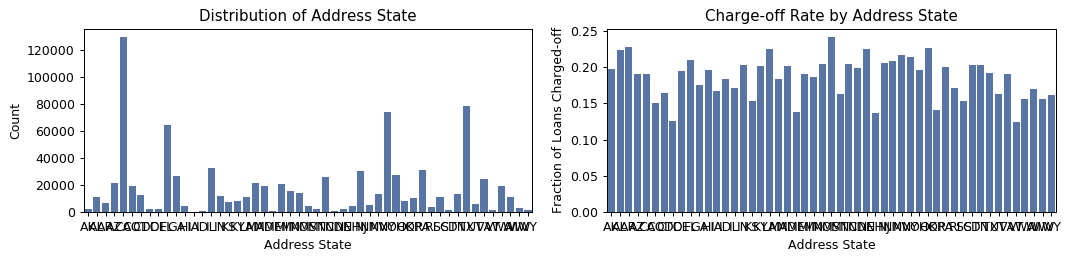

In [45]:
plot_var('addr_state', 'Address State', continuous=False)

In [46]:
#there are 51 unique values for state and the bar chart for charge-offs by state does not show any prominent trend. All the state have more or less similar charge-off rates, so we will drop this feature
df_NewAppl.drop(labels='addr_state', axis=1, inplace=True)


3. annual_inc

The summary stats show annual income values range from 0 to 10,999,200 with a median of 65,000. Since the values vary so much we will transform the data using minmax scaler. We will create a new feature called 'annual_inc_norm' and store these values there and then drop the feature annual_inc. This will scale the annual income data between 0 and 1.

From the plot it appears that individuals who paid off the loans have slightly higher annual income.


In [47]:
df_NewAppl['annual_inc'].describe()

count    888553.000000
mean      65335.405348
std       28820.618072
min           0.000000
25%       44000.000000
50%       60000.000000
75%       82000.000000
max      156186.000000
Name: annual_inc, dtype: float64

In [48]:
from sklearn.preprocessing import minmax_scale
# mix-max scale the annual income data between 0 and 1
df_NewAppl['annual_inc_norm'] = minmax_scale(df_NewAppl['annual_inc'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
print_stats('annual_inc_norm', True)

------------------------------------------------------------ 
 Individual Summary Statistics for annual_inc_norm 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean          0.418318
std           0.184528
min           0.000000
25%           0.281715
50%           0.384157
75%           0.525015
max           1.000000
Name: annual_inc_norm, dtype: float64 
 --------------------
Sample Observations 
 1283321    0.288118
1687816    0.252904
800861     0.576236
503048     0.396963
980814     0.326534
Name: annual_inc_norm, dtype: float64 
 --------------------
Number of Uniques 
 46363 
 --------------------
Group_by 
                 count      mean       std  min       25%       50%       75%       max
loan_status                                                                           
Charged Off  170996.0  0.393275  0.176147  0.0  0.262508  0.358547  0.484592  1.000000
Fully Paid   717557.0  0.424286  0.185972  0.0  0.288118  0.3841

In [50]:
print_stats('annual_inc', True)

------------------------------------------------------------ 
 Individual Summary Statistics for annual_inc 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean      65335.405348
std       28820.618072
min           0.000000
25%       44000.000000
50%       60000.000000
75%       82000.000000
max      156186.000000
Name: annual_inc, dtype: float64 
 --------------------
Sample Observations 
 1786427     91000.0
603600      55000.0
1110701     16000.0
1802491     70000.0
1174420    109000.0
Name: annual_inc, dtype: float64 
 --------------------
Number of Uniques 
 46363 
 --------------------
Group_by 
                 count          mean           std  min      25%      50%      75%       max
loan_status                                                                                
Charged Off  170996.0  61424.073248  27511.753867  0.0  41000.0  56000.0  75686.5  156186.0
Fully Paid   717557.0  66267.487599  29046.257243  0.0  45000.0 

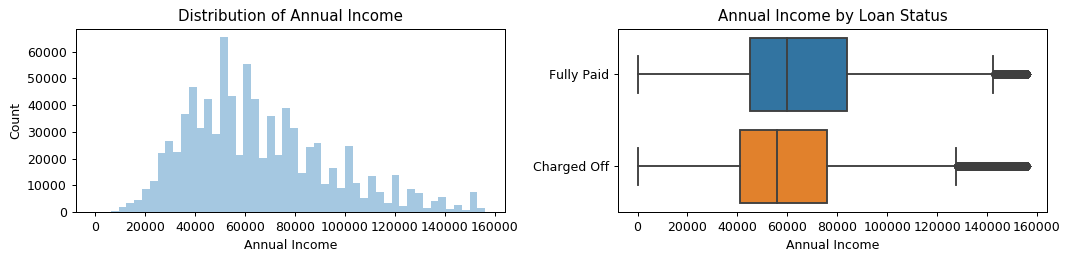

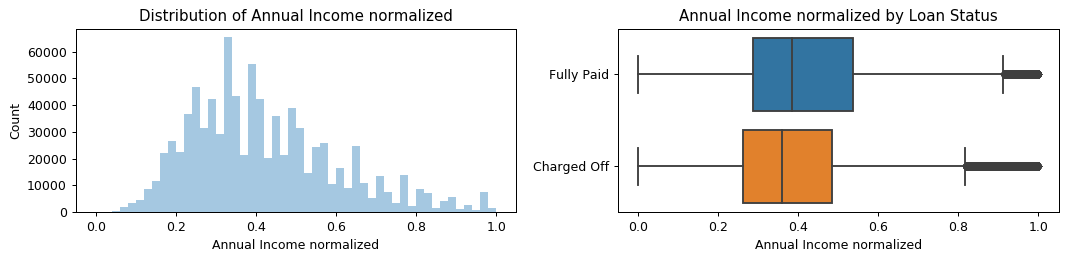

In [51]:
#lets compare and chaeck if both ditributions are same after normalization
plot_var('annual_inc', 'Annual Income', continuous=True)
plot_var('annual_inc_norm', 'Annual Income normalized', continuous=True)

#yes! they are same. So hence forth we will use annual_inc_norm

4. loan_amnt




------------------------------------------------------------ 
 Individual Summary Statistics for loan_amnt 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean      13211.045824
std        7589.800367
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       38000.000000
Name: loan_amnt, dtype: float64 
 --------------------
Sample Observations 
 967858      6500
1170665    26400
1310758     4200
802304      5000
1866203    20400
Name: loan_amnt, dtype: int64 
 --------------------
Number of Uniques 
 1431 
 --------------------
Group_by 
                 count          mean          std    min     25%      50%      75%      max
loan_status                                                                               
Charged Off  170996.0  14281.453806  7807.601512  900.0  8000.0  12950.0  20000.0  38000.0
Fully Paid   717557.0  12955.964369  7514.511223  500.0  7000.0  11900.0  18000.0  38000

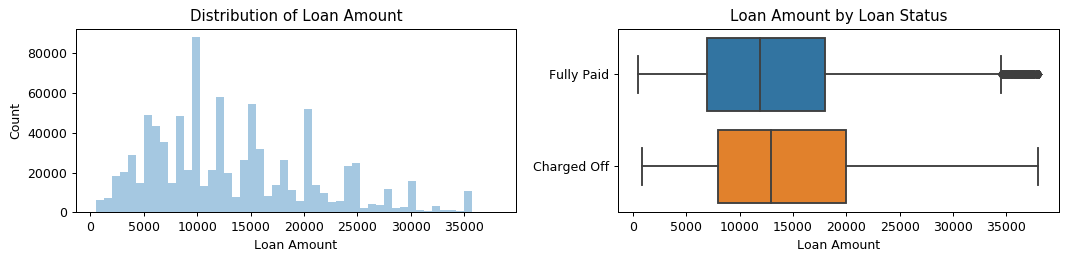

In [52]:
print_stats('loan_amnt', True)
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [53]:
#After plotting we see charged off loans have higher loan amount

5. term

In [54]:
print_stats('term')



------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count         888553
unique             2
top        36 months
freq          683990
Name: term, dtype: object 
 --------------------
Sample Observations 
 1737550     60 months
805330      36 months
1852187     36 months
1995088     36 months
1823121     36 months
Name: term, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
  36 months    683990
 60 months    204563
Name: term, dtype: int64 
 --------------------


In [55]:
#Term has values ‘36 months’ or ‘60 months’. We will convert it into integer as follows
df_NewAppl['term'] = df_NewAppl['term'].apply(lambda s: np.int8(s.split()[0]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
df_NewAppl['term'].value_counts(normalize=True) #SHows about 76% of loans have 3 year period and rest are 5 year loans

36    0.76978
60    0.23022
Name: term, dtype: float64

In [57]:
df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#If we focus only on charged off loans, 5 year loans are almost TWICE as likely to go BAD as 3 year loans!!!

term
36    0.155806
60    0.314945
Name: loan_status, dtype: float64

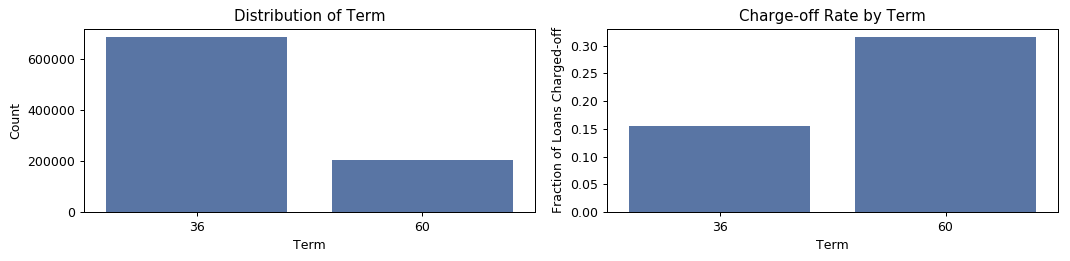

In [58]:
plot_var('term', 'Term', continuous=False)

6. Int_rate

In [59]:
print_stats('int_rate', True)


------------------------------------------------------------ 
 Individual Summary Statistics for int_rate 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         12.900300
std           4.378491
min           5.310000
25%           9.490000
50%          12.690000
75%          15.610000
max          25.340000
Name: int_rate, dtype: float64 
 --------------------
Sample Observations 
 1703799    16.20
687796     24.99
1812845    20.49
1245023    12.29
735441     24.99
Name: int_rate, dtype: float64 
 --------------------
Number of Uniques 
 594 
 --------------------
Group_by 
                 count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off  170996.0  15.139194  4.254223  5.31  12.12  14.65  18.06  25.34
Fully Paid   717557.0  12.366764  4.236468  5.31   9.16  11.99  14.99  25.34 
 --------------------


Shows int_rate ranges from 5 to 25%!

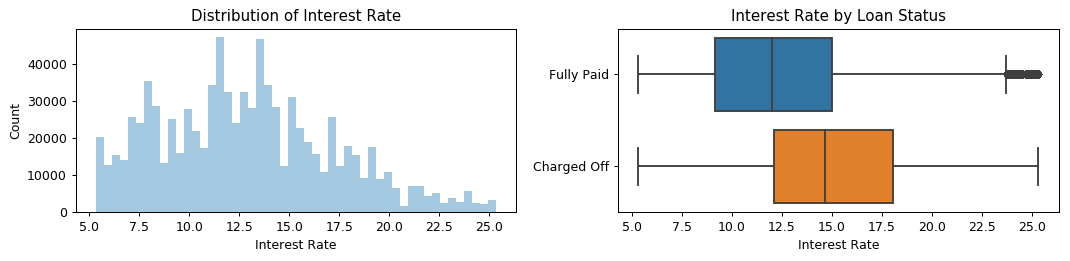

In [60]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Shows charged off loans have much HIGHER interest rate!!

Next let's compare the summary statistics by loan status:

In [61]:
df_NewAppl.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170996.0,15.139194,4.254223,5.31,12.12,14.65,18.06,25.34
Fully Paid,717557.0,12.366764,4.236468,5.31,9.16,11.99,14.99,25.34


7. Installment

In [62]:
print_stats('installment')

------------------------------------------------------------ 
 Individual Summary Statistics for installment 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean        398.371542
std         216.407369
min          14.010000
25%         237.520000
50%         355.300000
75%         527.710000
max        1077.890000
Name: installment, dtype: float64 
 --------------------
Sample Observations 
 975499     334.97
770809     318.75
878017     119.61
1784484    748.62
1008638    589.22
Name: installment, dtype: float64 
 --------------------
Number of Uniques 
 69342 
 --------------------


In [63]:
#Installments range from $4.93 to $1,719, with a median of $375

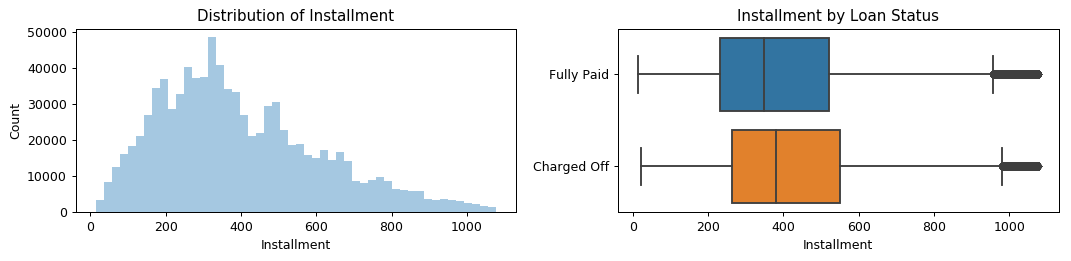

In [64]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [65]:
df_NewAppl.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170996.0,420.750440,215.421860,21.62,263.99,379.28,550.68,1077.67
Fully Paid,717557.0,393.038584,216.300353,14.01,230.74,348.18,521.03,1077.89


8. grade
9. sub_grade

In [66]:
print(sorted(df_NewAppl['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [67]:
print(sorted(df_NewAppl['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [68]:
#the grade is implied by the subgrade, so let's drop the grade column.
df_NewAppl.drop('grade', axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


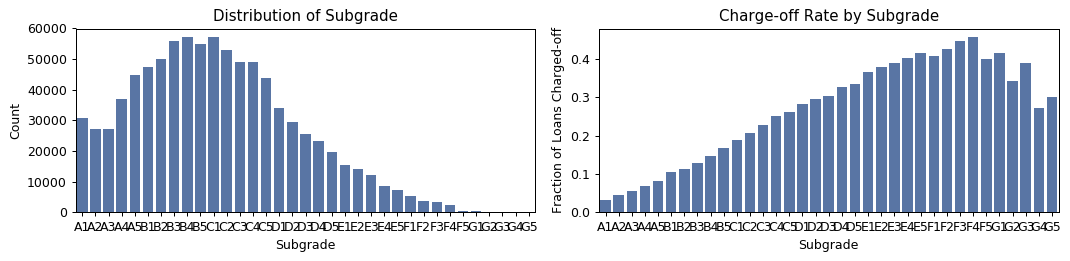

In [69]:
plot_var('sub_grade', 'Subgrade', continuous=False)

In [82]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df_NewAppl['num_subgrade']= label_encoder.fit_transform(df_NewAppl['sub_grade']) 

df_NewAppl['num_subgrade'].unique() 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([ 2,  7, 15, 10, 20,  9,  5, 16,  8,  3,  6, 12,  4,  1, 14, 13, 17,
       18,  0, 11, 22, 21, 19, 24, 23, 28, 25, 32, 26, 27, 31, 30, 29, 34,
       33])

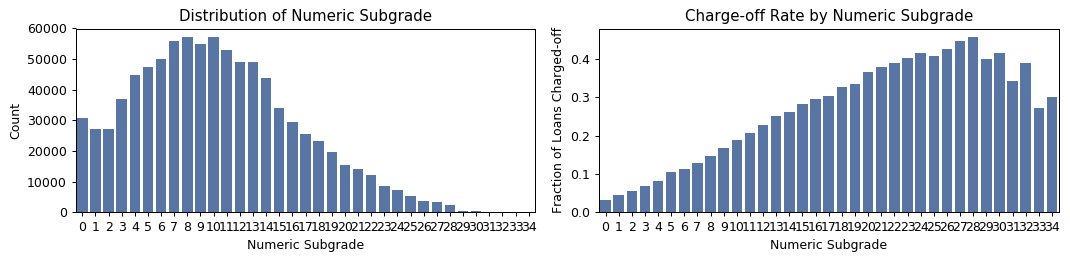

In [83]:
plot_var('num_subgrade', 'Numeric Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade gets worse!

10. emp_title

In [84]:
print_stats('emp_title')

------------------------------------------------------------ 
 Individual Summary Statistics for emp_title 
 ------------------------------------------------------------
Describe 
 count      835115
unique     281839
top       Teacher
freq        14898
Name: emp_title, dtype: object 
 --------------------
Sample Observations 
 1757531    New Creation Home Care Services
1677785                                LPN
2245886                     Police Officer
931361                             teacher
2046748                            Manager
Name: emp_title, dtype: object 
 --------------------
Number of Uniques 
 281839 
 --------------------


In [85]:
#There are too many unique values of emp_title to be useful. So we will drop this feature
df_NewAppl.drop(labels='emp_title', axis=1, inplace=True)

11. emp_length

In [86]:
print_stats('emp_length')
df_NewAppl['emp_length'].value_counts(dropna=False).sort_index()

------------------------------------------------------------ 
 Individual Summary Statistics for emp_length 
 ------------------------------------------------------------
Describe 
 count    839903.000000
mean          5.794185
std           3.687045
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64 
 --------------------
Sample Observations 
 1998352     8.0
699923     10.0
908095      1.0
1556712    10.0
1944372    10.0
Name: emp_length, dtype: float64 
 --------------------
Number of Uniques 
 11 
 --------------------
Unique value counts 
 10.0    273785
2.0      84558
0.0      75306
3.0      74010
1.0      62282
5.0      57332
4.0      55154
6.0      42697
7.0      40413
8.0      40368
9.0      33998
Name: emp_length, dtype: int64 
 --------------------


0.0      75306
1.0      62282
2.0      84558
3.0      74010
4.0      55154
5.0      57332
6.0      42697
7.0      40413
8.0      40368
9.0      33998
10.0    273785
NaN      48650
Name: emp_length, dtype: int64

Note there are 75454 loans with missing value for the length of employment.


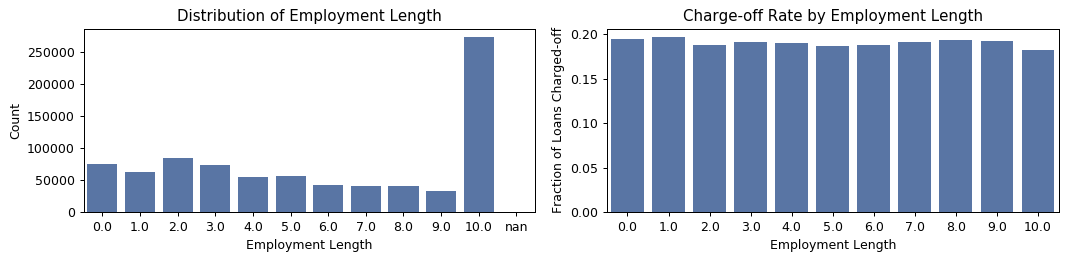

In [87]:
plot_var('emp_length', 'Employment Length', continuous=False)

THere doesn't seem to be significant effect of employment length on loan status
As the plot shows loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

12. home_ownership

In [88]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    411309
RENT        381745
OWN          95156
ANY            173
OTHER          129
NONE            41
Name: home_ownership, dtype: int64

Let's combine the category ANY and NONO into OTHER

In [89]:
df_NewAppl['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [90]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    411309
RENT        381745
OWN          95156
OTHER          343
Name: home_ownership, dtype: int64

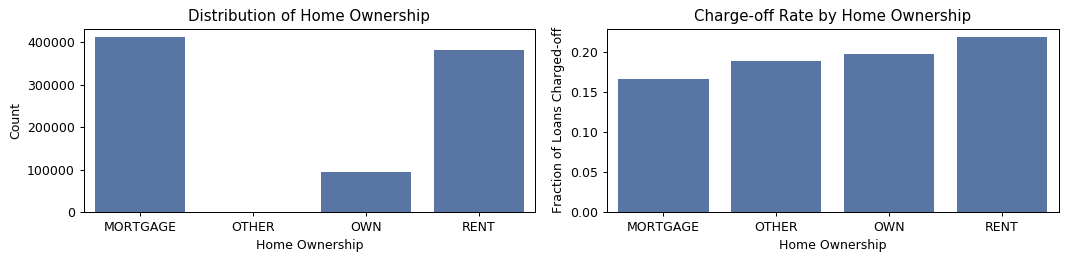

In [91]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appears to be significant differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [92]:
df_NewAppl.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']



home_ownership
MORTGAGE    0.166556
OTHER       0.189504
OWN         0.198495
RENT        0.218829
Name: loan_status, dtype: float64

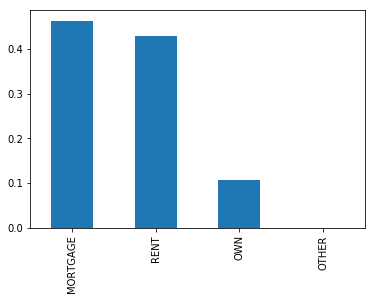

In [93]:
df_NewAppl['home_ownership'].value_counts(dropna=False, normalize = True).plot(kind='bar')

13. application_type
Tells whether the loan application is individual or joint application

From our plot and summary stats we see that - Joint loans are more likely to be charged off than individual loans

In [94]:
print_stats('application_type', True)


print(df_NewAppl.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])


------------------------------------------------------------ 
 Individual Summary Statistics for application_type 
 ------------------------------------------------------------
Describe 
 count         888553
unique             2
top       Individual
freq          876475
Name: application_type, dtype: object 
 --------------------
Sample Observations 
 1100833    Individual
722235     Individual
1705512    Individual
610721     Individual
1097869    Individual
Name: application_type, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 Individual    876475
Joint App      12078
Name: application_type, dtype: int64 
 --------------------
Group_by 
               count unique         top    freq
loan_status                                   
Charged Off  170996      2  Individual  168210
Fully Paid   717557      2  Individual  708265 
 --------------------
application_type
Individual    0.191916
Joint App     0.230667
Name: loan_status, d

In [ ]:
print(df_NewAppl.groupby('application_type')['loan_status'].value_counts(normalize=False).loc[:,'Charged Off'])

application_type
Individual    168210
Joint App       2786
Name: loan_status, dtype: int64


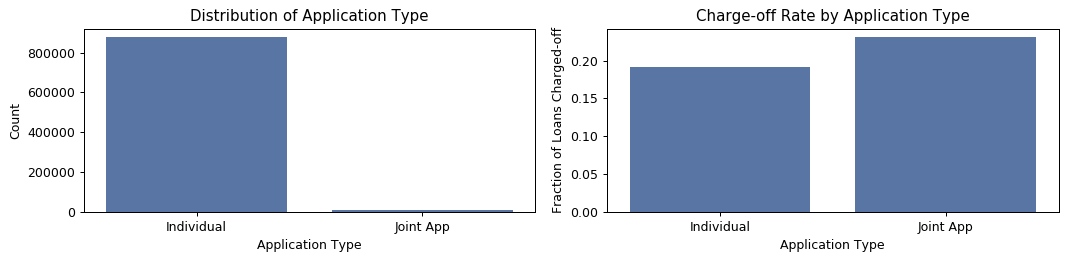

In [ ]:
plot_var('application_type', 'Application Type', continuous=False)

14. dti : debt to income ratio (debt excluding mortgage and current application debt)

In [ ]:
print_stats('dti')

------------------------------------------------------------ 
 Individual Summary Statistics for dti 
 ------------------------------------------------------------
Describe 
 count    888341.000000
mean         18.017513
std           8.280638
min           0.000000
25%          11.840000
50%          17.560000
75%          23.830000
max          42.390000
Name: dti, dtype: float64 
 --------------------
Sample Observations 
 29113       9.36
1021608    38.28
204626      8.46
2133252     8.95
1142720     7.58
Name: dti, dtype: float64 
 --------------------
Number of Uniques 
 4222 
 --------------------


In [ ]:

df_NewAppl.dti.nunique()

4222

In [ ]:
df_NewAppl.shape

(888553, 23)

In [ ]:
df_NewAppl[df_NewAppl.dti > 24].dti.count()

216807

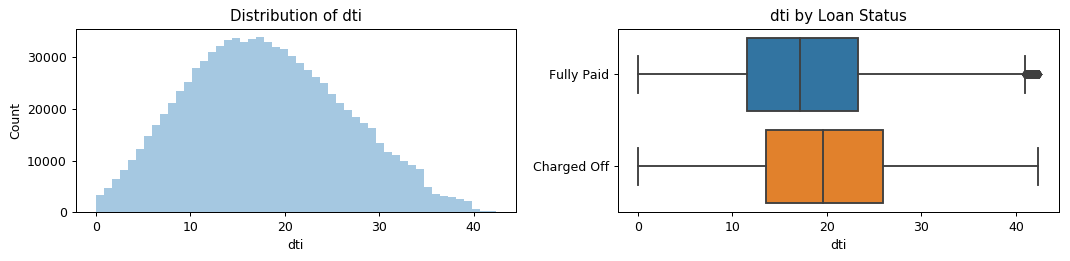

In [ ]:
plot_var('dti', 'dti', continuous=True)

15. initial_list_status: Initial listing status of the listing

In [ ]:
plot_var('dti', 'dti Type', continuous=False)

In [ ]:
print_stats('initial_list_status')

16. mort_acc: number of mortgage accounts

In [ ]:
plot_var('initial_list_status', 'initial_list_status', continuous=False)

In [ ]:
print_stats('mort_acc')

In [ ]:
plot_var('mort_acc', 'mort_acc', continuous=False)

17. open_acc: the number of open credit lines in borrower's credit line

In [ ]:
print_stats('open_acc')

In [ ]:
plot_var('open_acc', 'open_acc', continuous=False)

18. pub_rec : number of derogatory public accounts

In [ ]:
print_stats('pub_rec')

In [ ]:
#Since pub_rec is all zeros, we will drop this column
df_NewAppl.drop('pub_rec', axis=1, inplace=True)

In [ ]:
#19. pub_rec_bankruptcies: number of public record bankruptcies

In [ ]:
print_stats('pub_rec_bankruptcies')
print(df_NewAppl.pub_rec_bankruptcies.value_counts())
print(df_NewAppl.pub_rec_bankruptcies.value_counts(normalize=True))

In [ ]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankrptcies', continuous=False)

In [ ]:
#Since pub_rec_bankruptcies is all zeros, we will drop this column
df_NewAppl.drop('pub_rec_bankruptcies', axis=1, inplace=True)

20. purpose: a category provided by the borrower for the loan request

In [ ]:
print_stats('purpose')
print(df_NewAppl.purpose.value_counts())


In [ ]:
plot_var('purpose', 'purpose', continuous=False)

In [ ]:
#Paymet plan
print_stats('pymnt_plan')

In [ ]:
#Since there is only one value 'n' we could drop this column

In [ ]:
#21. revol_bal: total credit revolving balance

In [ ]:
#delinq_2yrs

In [ ]:
print_stats('delinq_2yrs')
plot_var('delinq_2yrs', 'delinq_2yrs', continuous=False)

In [ ]:
#earliest_cr_line
print_stats('earliest_cr_line')


In [ ]:
#inq_last_6mths
print_stats('inq_last_6mths')
plot_var('inq_last_6mths', 'inq_last_6mths', continuous=False)

In [ ]:
print_stats('out_prncp')
#This is all zeros, so we could drop this

In [ ]:
print_stats('collections_12_mths_ex_med')
plot_var('collections_12_mths_ex_med', 'collections_12_mths_ex_med', continuous=False)

In [ ]:
print_stats('total_il_high_credit_limit')
plot_var('pub_rec_bankruptcies', 'pub_rec_bankruptcies', continuous=False)

In [ ]:
#21. revol_bal: total credit revolving balance

In [ ]:
print_stats('revol_bal')


In [ ]:
plot_var('revol_bal', 'revol_bal', continuous=True)

In [ ]:
#22. revol_util: revolving line utilization rate

In [ ]:
print_stats('revol_util')

In [ ]:
plot_var('revol_util', 'revol_util', continuous=True)

In [ ]:
#23. title

In [ ]:
print_stats('title')

In [ ]:
#There are too many unique values of title to be useful. So we will drop this feature
df_NewAppl.drop(labels='title', axis=1, inplace=True)

In [ ]:
#earliest_cr_line
print_stats('earliest_cr_line')

In [ ]:
#Since there are too many uniques values of earliest_cr_line, we will drop this column
df_NewAppl.drop(labels='earliest_cr_line', axis=1, inplace=True)

In [ ]:
#24. total_acc: the total number of credit lines currently in the borrower's credit line

In [ ]:
print_stats('total_acc')

In [ ]:
plot_var('total_acc', 'total_acc', continuous=True)

In [ ]:
#25. verification_status

In [ ]:
print_stats('verification_status')

In [ ]:
# Encode labels in column 'species'. 
df_NewAppl['num_verification_status']= label_encoder.fit_transform(df_NewAppl['verification_status']) 

df_NewAppl['num_verification_status'].unique() 

In [ ]:
plot_var('verification_status', 'verification_status', continuous=False)

In [ ]:
plot_var('num_verification_status', 'Numerical verification_status', continuous=False)

-fico_range_low, fico_range_high : upper and lower boundary range for fico score
FICO score, a measure of consumer credit risk


In [ ]:
print_stats('fico_range_low')

In [108]:
print(df_NewAppl.dtypes)
print(df_NewAppl.shape)
print(df_NewAppl.isnull().sum())


loan_amnt                int64
term                     int64
int_rate               float64
installment            float64
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
open_acc               float64
revol_bal                int64
revol_util             float64
total_acc              float64
initial_list_status     object
application_type        object
mort_acc               float64
annual_inc_norm        float64
dtype: object
(888553, 20)
loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length             48650
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                      212
open_

Missing Values
----------------

There are 888553 observations out of which 800 or so have missing values. In effect there are 0.0009% rows have missing values. This is a very miniscuse percent so we could safely drop the rows with missing values without having any impact on our future models.


In [109]:
df_NewAppl.dropna(inplace=True)

In [110]:
print(df_NewAppl.dtypes)
print(df_NewAppl.shape)
print(df_NewAppl.isnull().sum())

loan_amnt                int64
term                     int64
int_rate               float64
installment            float64
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
open_acc               float64
revol_bal                int64
revol_util             float64
total_acc              float64
initial_list_status     object
application_type        object
mort_acc               float64
annual_inc_norm        float64
dtype: object
(799780, 20)
loan_amnt              0
term                   0
int_rate               0
installment            0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
open_acc               0
revol_bal              0
rev

Inferential Statistics - Test 1
-----------------------

1. Term:
--------

Next we will perform a statistical analysis to establish whether term has a significant impact on the charge backs aka our target variable loan_status

1. Test:
We will use Z statistic test for this problem
Explanation- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis:

Null Hypothesis H0: P1 = P2 i.e.There are no differences in both sample proportions i.e. term has no impact on the charge offs

Alternate hypothesis H1: P1<>P2 Both sample proportions are different i.e. term has impact on the charge offs

3. Significance:
Confidence Level : 90%

4. Analysis Plan:
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [111]:
print_stats('term')

------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count    799780.000000
mean         41.614874
std          10.160231
min          36.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: term, dtype: float64 
 --------------------
Sample Observations 
 695977     36
1885275    36
1008155    60
1622134    36
1298420    36
Name: term, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 36    612669
60    187111
Name: term, dtype: int64 
 --------------------


In [112]:
df_NewAppl.term.value_counts()

36    612669
60    187111
Name: term, dtype: int64

In [113]:
df1 = df_NewAppl[df_NewAppl.term == 36][['loan_status', 'term']].sample(n=100)
df2 = df_NewAppl[df_NewAppl.term==60][['loan_status', 'term']].sample(n=100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [114]:
df2.describe()

,term
count,100.0
mean,60.0
std,0.0
min,60.0
25%,60.0
50%,60.0
75%,60.0
max,60.0


In [115]:
df_sample.dtypes

loan_status    object
term            int64
dtype: object

In [116]:
df_sample.describe()

,term
count,200.000000
mean,48.000000
std,12.030113
min,36.000000
25%,36.000000
50%,48.000000
75%,60.000000
max,60.000000


In [117]:
df_sample.term.value_counts()

60    100
36    100
Name: term, dtype: int64

In [118]:
df_sample.sample(5)

,loan_status,term
879317,Fully Paid,60
1956918,Fully Paid,60
1852681,Charged Off,36
1388482,Fully Paid,36
435195,Fully Paid,36


In [119]:
df_sample['charge_off'] = df_sample['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)


In [120]:
#next we will find the sample proportions
# number of charge offs for 36 and 60 months term
total_36CB = sum(df_sample[df_sample.term==36].charge_off)
total_60CB = sum(df_sample[df_sample.term==60].charge_off)

total_60 = df_sample[df_sample.term==60].term.count()
total_36 = df_sample[df_sample.term==36].term.count()


In [121]:
print(total_36CB)
print(total_60CB)
print(total_60)
print(total_36)


15
31
100
100


In [122]:
#source https://stattrek.com/hypothesis-test/difference-in-proportions.aspx

p1 = total_36CB/total_36
p2 = total_60CB/total_60
n1 = total_36
n2 = total_60
confidence_level = 90
p = (p1 * n1 + p2 * n2) / (n1 + n2)
SE = np.sqrt(p * ( 1 - p ) * ( (1/n1) + (1/n2) ))
z = (p1 - p2) / SE
a = 1 - (confidence_level / 100)


p_val=1-stats.norm.cdf(abs(z))
z_critical=stats.norm.ppf((1+0.90)/2)

ci_low = p1-p2-z_critical*SE
ci_high = p1-p2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)



P value is 0.003589645851197698
Significance level alpha is 0.09999999999999998
Confidence Interval at 95% is -0.25789297683902535  to  -0.06210702316097466
Margin of Error is  -0.16


Interpretation for Inferential statistics - Test 1:
----------------
 Comparing the P-value to the significance level, we see that the P-value is less than the significance level. (p<a)
 So we have to reject the null hypothesis. 
 That means Both sample proportions are different i.e. with 90% confidence we can say that term has significant impact on the charge backs 

Inferential statistics - Test 2
-----------------------

2. Interest Rate
=================


Next we will perform a statistical analysis to establish whether interest_rate has a significant impact on the charge backs ie our target variable loan_status

1. Test
We will use two sample Z statistic test two sided for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. interest_rate has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. interest_rate has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [123]:
df1 = df_NewAppl[df_NewAppl.loan_status == 'Fully Paid'][['loan_status', 'int_rate']].sample(100)
df2 = df_NewAppl[df_NewAppl.loan_status == 'Charged Off'][['loan_status', 'int_rate']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [124]:
df_sample.describe()

,int_rate
count,200.000000
mean,13.787400
std,4.501765
min,5.320000
25%,10.472500
50%,13.465000
75%,16.560000
max,24.990000


In [125]:
df_sample.loan_status.value_counts()

Charged Off    100
Fully Paid     100
Name: loan_status, dtype: int64

In [126]:
df_sample.sample(5)

,loan_status,int_rate
586045,Fully Paid,13.49
1064048,Fully Paid,15.61
2011281,Fully Paid,11.67
2069604,Fully Paid,14.16
850868,Charged Off,22.74


In [127]:
m1 = np.mean(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])
std1 = np.std(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])

m2 = np.mean(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])
std2 = np.std(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])

n1 = df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'].count()
n2 = df_sample[df_sample.loan_status == 'Charged Off']['int_rate'].count()
confidence_level = 95

SE = np.sqrt( ((std1*std1)/n1) + ((std2*std2)/n2) )


z = (m1 - m2) / SE
a = 1 - (confidence_level / 100)


p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = m1-m2-z_critical*SE
ci_high = m1-m2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 4.1871371909696364e-06
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -3.9625926342824265  to  -1.5954073657175625
Margin of Error is  -2.7789999999999946


Interpretation for Inferential statistics - Test 1:
----------------
     comparing the P-value to the significance level, we see that the P-value is less than the alpha a.
     So we have reject the null hypothesis. 
    That means Both sample means are different i.e. 
    with 95% confidence we can say that int_rate has significant impact on the charge offs 

In [339]:
df_NewAppl['target'] = df_NewAppl['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)


Pearson Correlation
-----------------------

We find Pearson correlation coefficients between pairs of features from our feature set. Correlation could be either positive or negative. We set the threshold of 0.3 and remove a feature where correlation coefficient > 0.3.

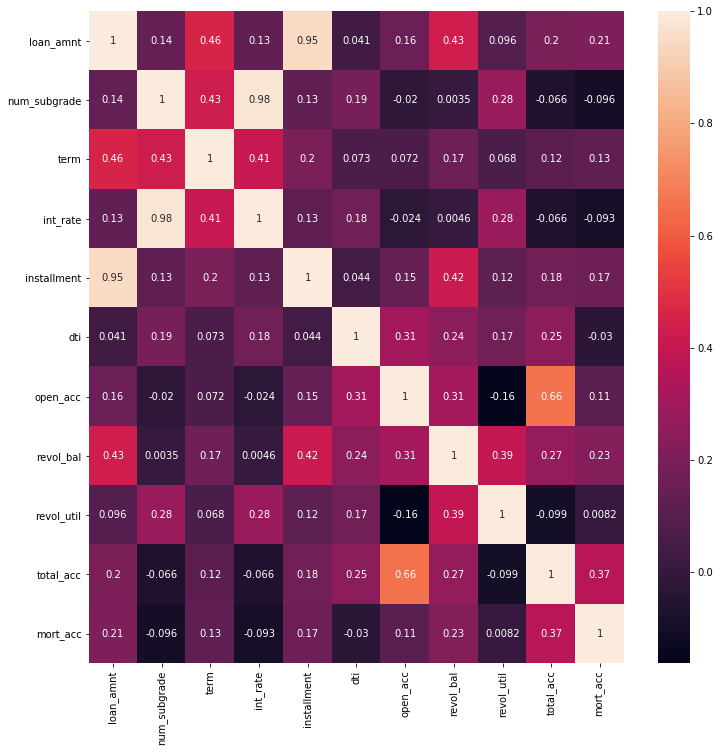

In [272]:
plot_list = ['loan_amnt', 'num_subgrade','term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc']

df_plot = pd.DataFrame()
df_plot[plot_list] = df_NewAppl[plot_list]
plt.figure(figsize=(12,12))
cor = df_plot.corr()
sns.heatmap(cor, annot=True)


Loan amount and installment has a correlation coefficient of 0.95

Term and loan amount
Term and Interest rate

Open account and dti
Open account and total account

Revolving balance and annual income
Revolving balance and open account
Revolving balance and loan amount
revolving balance and Revolving util 
Revolving balance and installment

Total acc and mort acc

Annual income and mort acc
Annual income and total acc
Annual income and revolving balance
Annual income and installment
Annual income and loan amount

We could set the threshold of 0.3 and could remove a feature where correlation coefficient > 0.3

ML Model
------------


The aim is to find y , a target variable based on knowing a list of features X. We are trying to predict 'Loan Status'. Loan_status feature is converted to target feature  with values 0 = 'Fully paid' and 1 = 'Charged Off'. Since target variable takes only 2 values 0 and 1, this will be a binary classification problem.
First we will use 'Logistic Regression'

Training and Test Datasets
When fitting models, we would like to ensure two things:

- We have found the best model (in terms of model parameters).
- The model is highly likely to generalize i.e. perform well on unseen data.

We will  be using a combination of 2 approaches-

-Holdout 
The given data set is divided into 2 partitions as test and train 20% and 80% respectively. The train set will be used to train the model and the unseen test data will be used to test its predictive power.

10 fold Cross Validation
The 80% train data set is randomly partitioned into 10 mutually exclusive subsets, each approximately equal size. Training and testing iterated over these 10 folds.

Finally the trained model is tested on the 20% holdout set.

First, we try a basic Logistic Regression:

- Split the data into a training and test (hold-out) set
- Train on the training set, and test for accuracy on the testing set

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

RFE
-----

Next we will use RFE. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You will use RFE with the Logistic Regression classifier to select the top 4 features. 

In [290]:

feature_list = ['loan_amnt', 'num_subgrade','term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc', 'annual_inc_norm' ]
#feature_list = ['int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc', 'annual_inc_norm' ]
#feature_list0 = [ 'num_subgrade','term', 'int_rate','installment', 'dti','open_acc','revol_util', 'mort_acc', 'annual_inc_norm' ]
feature_list0 = ['loan_amnt', 'num_subgrade','num_verification_status', 'term', 'dti','open_acc','revol_util', 'mort_acc', 'annual_inc_norm' ]




X = df_NewAppl[feature_list0].values
y = df_NewAppl.target

# Feature extraction
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [False  True  True False False False False  True  True]
Feature Ranking: [6 1 1 2 3 4 5 1 1]


RFE chose the top 4 features as 'sub_grade', 'term','int_rate','dti','mort_acc' 

Let's first build the model with only top 4 features. Next we will build the model with all features. THen compare and see how the model performs.

Base Model
==========

In [135]:

feature_list = ['term','int_rate','dti','mort_acc']

X = df_NewAppl[feature_list].values
y = df_NewAppl.target

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y,random_state=5)

clf = LogisticRegression(solver='lbfgs')

# Fit the model on the trainng data.
clf.fit(Xlr, ylr)

# Print the accuracy from the testing data.
y_predicted= clf.predict(Xtestlr)
print("Accuracy Score = ", accuracy_score(y_predicted, ytestlr))

# performance
print("Classification report for %s" % clf)
print(metrics.classification_report(ytestlr, y_predicted))

print(metrics.confusion_matrix(ytestlr,y_predicted))


Accuracy Score =  0.8085073395183675
Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.82      0.99      0.89    161771
           1       0.49      0.05      0.09     38174

   micro avg       0.81      0.81      0.81    199945
   macro avg       0.65      0.52      0.49    199945
weighted avg       0.75      0.81      0.74    199945

[[159714   2057]
 [ 36231   1943]]


Handling Imbalanced distribution using class_weight of LogisticRegression
--------------------------------------------
As we have previously seen, out target variable is highlay imbalanced (0=80% and 1=20%).
LogisticRegression comes with a built-in method of handling imbalanced classes. If we have highly imbalanced classes then we have the option of using the class_weight parameter to weight the classes to make certain we have a balanced mix of each class. Specifically, the balanced argument will automatically weigh classes inversely proportional to their frequency:


In [340]:
feature_list = ['term','int_rate','dti','mort_acc']

X = df_NewAppl[feature_list].values
y = df_NewAppl.target

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y,random_state=5)

clf = LogisticRegression(solver='lbfgs', random_state=0, class_weight='balanced', max_iter=1000)

# Fit the model on the trainng data.
clf.fit(Xlr, ylr)

# Print the accuracy from the testing data.
y_predicted= clf.predict(Xtestlr)
print("Accuracy Score = ", accuracy_score(y_predicted, ytestlr))

# performance
print("Classification report for %s" % clf)
print(metrics.classification_report(ytestlr, y_predicted))

print(metrics.confusion_matrix(ytestlr,y_predicted))



ValueError: could not convert string to float: ' 36 months'

In [137]:
#Next let's build the model with all the features and compare
#this will most probably lead to over fitting

In [266]:
feature_list2 = ['loan_amnt', 'term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc','annual_inc_norm' ]

#Next let's build the model with all the features and compare

X2 = df_NewAppl[feature_list0].values
y2 = df_NewAppl.target

# Split the data into a training and test set.
Xlr2, Xtestlr2, ylr2, ytestlr2 = train_test_split(X2, y2,random_state=5)

clf2 = LogisticRegression(solver='lbfgs', random_state=1, class_weight='balanced', max_iter=1000)

# Fit the model on the trainng data.
history = clf2.fit(Xlr2, ylr2)

# Print the accuracy from the testing data.
y_predicted2= clf2.predict(Xtestlr2)


In [267]:
print("\nModel Performance Metrics : ")
print('-'*30)
# accuracy:
accuracy = accuracy_score(ytestlr2, y_predicted2)
print('Accuracy  : %f' % accuracy)


# performance
print("\nModel Classification report :")
print('-'*30)
Model1 = metrics.classification_report(ytestlr2, y_predicted2)

print(Model1)


Model Performance Metrics : 
------------------------------
Accuracy  : 0.637495

Model Classification report :
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.63      0.74    161771
           1       0.30      0.65      0.41     38174

   micro avg       0.64      0.64      0.64    199945
   macro avg       0.59      0.64      0.57    199945
weighted avg       0.77      0.64      0.68    199945



In [271]:

#1.Use the C and train a Logistic Regression on the training data
clf = LogisticRegression(C=0.001, solver='lbfgs', class_weight='balanced')
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)

y_predicted= clf.predict(Xtestlr)


#2.Calculate the accuracy on the test data
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

# performance
print("Classification report for %s" % clf)
print(metrics.classification_report(ytestlr, y_predicted))

print(metrics.confusion_matrix(ytestlr,y_predicted))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6113331166070669
Classification report for LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.60      0.72    161771
           1       0.28      0.65      0.39     38174

   micro avg       0.61      0.61      0.61    199945
   macro avg       0.58      0.62      0.55    199945
weighted avg       0.76      0.61      0.65    199945

[[97544 64227]
 [13485 24689]]


In [141]:
#let's do K fold cross validation and find the F1 scores

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')
#print(scores)
print("F1 score: %0.2f with 95%% Confidence Interval (+/- %0.4f)\n" % (scores.mean(), scores.std() *2))

print("Classification report for all folds %s\n" % clf)
print(scores)



F1 score: 0.74 with 95% Confidence Interval (+/- 0.0078)

Classification report for all folds LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[0.743115   0.74065221 0.73817282 0.73580589 0.73908172 0.73996382
 0.73389379 0.74895203 0.74076835 0.73936331]


Handling data imbalance using weighted sampling
-------------------------------------------------------


In [230]:
df_NewAppl.target.value_counts()

0    647325
1    152455
Name: target, dtype: int64

In [282]:
#data with 80-20 imbalance
df_NewAppl.target.value_counts(normalize=True)

0    0.809379
1    0.190621
Name: target, dtype: float64

In [283]:
print(df_NewAppl.shape)
print(df_sample.shape)

(799780, 23)
(332455, 22)


In [284]:
#taking a sample for 'fully paid = 0' and 'charged off=1'
#includig 180k for class0 and around 152k for class1
sample0 = df_NewAppl[df_NewAppl.target == 0].sample(n=180000)
sample1 = df_NewAppl[df_NewAppl.target==1]
frames = [sample0, sample1]
df_sample = pd.concat(frames)
df_sample.shape

X = df_sample[feature_list2]
y = df_sample.target

#split the train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [285]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(332455, 11)
(265964, 11)
(66491, 11)


In [286]:
df_sample.target.value_counts(normalize=True)
#imbalance -no more!

0    0.541427
1    0.458573
Name: target, dtype: float64

In [237]:
#let's do K fold cross validation and find the scores

from sklearn.model_selection import cross_val_predict

clf = LogisticRegression(solver='lbfgs', C=0.01)

y_predicted = cross_val_predict(clf, X_train, y_train, cv=10)
#accuracy
print("Accuracy Score = ", accuracy_score(y_predicted, y_train))

# performance
print("Classification report for %s" % clf)
print(metrics.classification_report(y_predicted, y_train))

print(metrics.confusion_matrix(y_predicted, y_train))



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Accuracy Score =  0.6455384939315095
Classification report for LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.72      0.66      0.69    158571
           1       0.55      0.63      0.59    107393

   micro avg       0.65      0.65      0.65    265964
   macro avg       0.64      0.64      0.64    265964
weighted avg       0.66      0.65      0.65    265964

[[104025  54546]
 [ 39728  67665]]


handling data imbalance using StratifiedKFold
-------------------------------------------------------
From the sklearn docs for cross_val_score's cv argument :

"For cv = integer/None inputs, if y is binary or multiclass, StratifiedKFold used. 

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

In [203]:
#let's do StratifiedKFold cross validation and find the scores

recall = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall')
precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')

print("Classification report for all folds %s\n" % clf)
print('Recall : ', np.mean(recall))
print('Precision : ', np.mean(precision))
print('F1 : ', np.mean(f1))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Classification report for all folds LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Recall :  0.5597074591986779
Precision :  0.6048345214980244
F1 :  0.5812291771507916


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#SGD
=====
Logistic regression with SGD¶
The SGDClassifier estimator in scikit-learn implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training. we choose logistic regression by setting loss = 'log'

We will also be usinf standard scaler to scale our features before usinng those in training the model.
this is done so that the variance of the features are in the same range. Thus we mitigate the risk of one feature dominating the other feature.

In [254]:
#feature_list = ['loan_amnt', 'num_subgrade','term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc', 'annual_inc_norm' ]


feature_list2 = [ 'num_subgrade','term', 'int_rate', 'dti','revol_util','total_acc', 'annual_inc_norm' ]


In [328]:
#The machine learning pipeline loss='log' for logistics model
pipeline_sgdlogreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [329]:
#grid of hyperparameters to search over
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1]
}

X = df_sample[feature_list0]
y = df_sample.target
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

#Create the search grid object
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)
#Conduct the grid search and train the final model on the whole dataset
grid_sgdlogreg.fit(X_train.astype(float), y_train)

#Mean cross-validated score of the best model
grid_sgdlogreg.best_score_

#Best hyperparameters
grid_sgdlogreg.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.8s finished


{'model__alpha': 0.01}

In [330]:
# Predict the labels of the test set: y_pred
y_pred = grid_sgdlogreg.predict(X_test)

# Compute and print metrics
print("Accuracy score on training set:", grid_sgdlogreg.best_score_)
print("Accuracy score on test dataset: {}".format(grid_sgdlogreg.score(X_test, y_test)))
print(metrics.classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(grid_sgdlogreg.best_params_))

#traning and test scores are similar, this shows the model is not overfitting

Accuracy score on training set: 0.7031064515959886
Accuracy score on test dataset: 0.7053174398676887
              precision    recall  f1-score   support

           0       0.65      0.75      0.70     35862
           1       0.64      0.53      0.58     30629

   micro avg       0.65      0.65      0.65     66491
   macro avg       0.65      0.64      0.64     66491
weighted avg       0.65      0.65      0.64     66491

Tuned Model Parameters: {'model__alpha': 0.01}


/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [223]:
# View The Best Parameters
print('Avg score:', grid_sgdlogreg.best_score_)
print('Best C:', grid_sgdlogreg.best_params_)

Avg score: 0.7051899158141858
Best C: {'model__alpha': 0.01}


Final Model:
Let's train our next model with balanced data and best hyperparameters and then we will compare the performance and classification metrics.


In [332]:

feature_list3 =['num_subgrade','num_verification_status', 'term', 'dti', 'mort_acc', 'annual_inc_norm' ]


In [335]:


X = df_sample[feature_list0]
y = df_sample.target


#split the train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

df_sample.target.value_counts(normalize=True)
#imbalance -no more!


(332455, 9)
(265964, 9)
(66491, 9)


0    0.541427
1    0.458573
Name: target, dtype: float64

In [336]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# Train the model
random.fit(X_train, y_train)
    
# Make predictions and evalute
random_pred = random.predict(X_test)


y_predicted = cross_val_predict(random, X_train, y_train, cv=10)
#accuracy
print("Accuracy Score = ", accuracy_score(y_predicted, y_train))

# performance
print("Classification report for %s" % random)
print(metrics.classification_report(y_predicted, y_train))

print(metrics.confusion_matrix(y_predicted, y_train))
#print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)


Accuracy Score =  0.6135567219623709
Classification report for LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.73      0.62      0.67    168335
           1       0.48      0.60      0.53     97629

   micro avg       0.61      0.61      0.61    265964
   macro avg       0.60      0.61      0.60    265964
weighted avg       0.64      0.61      0.62    265964

[[104715  63620]
 [ 39160  58469]]


Comparison of Base Model to “Final” Model
=========================================

Base Model
--------------
Accuracy Score =  0.8082622721248344
Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    161771
           1       0.48      0.05      0.08     38174

   micro avg       0.81      0.81      0.81    199945
   macro avg       0.65      0.52      0.49    199945
weighted avg       0.75      0.81      0.74    199945

Final Models
--------------
1. SGD
======
After hyperparamter tuning and scaling all the features using standardscaler.

Accuracy score on training set: 0.7001977031716071
Accuracy score on test dataset: 0.7023885636575766
              precision    recall  f1-score   support

           0       0.65      0.74      0.69     35862
           1       0.64      0.53      0.58     30629

   micro avg       0.65      0.65      0.65     66491
   macro avg       0.65      0.64      0.64     66491
weighted avg       0.65      0.65      0.64     66491

2. Logistics Regression
=======================
After hyperparameter tuning 

Accuracy score on training set: 0.6948059891541704
Accuracy score on test dataset: 0.6975098108396514
              precision    recall  f1-score   support

           0       0.65      0.75      0.69     35862
           1       0.64      0.52      0.57     30629

   micro avg       0.64      0.64      0.64     66491
   macro avg       0.64      0.63      0.63     66491
weighted avg       0.64      0.64      0.64     66491


Also if we compare the model training time

1. SGD
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.7s finished

2. Logistics Regression
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.2s finished

There is a huge improvement from base model performance to both our final models.
we see that SGD while on comparing performance/classification metric performed similarly. However it is slightly better when we compare model training time that with Logistics Regression.

Future Recommendations/ Improvements
------------------------------------------------
Since our train and test data come from the same file, 
we can safely say that the samples taken from train and test data are coming from the same ditribution.
This is ususally a contributing factor to get nicely performing ML model. 
However this may not be the case in the real world. 
So there is a possibility that the model maynot predict as efficiently with the real world data.
So we will need to iteratively keep training the model to include as diverse training cases as possible.
This is a good scope of future imporovement with respect to model efficiency in cases where model performs poorly. 